## Descriptive Analysis

In [1]:
import pandas as pd

In [2]:
# # df_yahoo = pd.read_csv("")
# df_analyst = pd.read_csv("../data/raw/raw_analyst_ratings.csv")
import dask.dataframe as dd
df_analyst = dd.read_csv("../data/raw/raw_analyst_ratings.csv")

In [3]:
df_analyst.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df_analyst.tail()

,Unnamed: 0,headline,url,publisher,date,stock
280296,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
280297,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
280298,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
280299,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
280300,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


#### No of characters in news headlines

<Axes: >

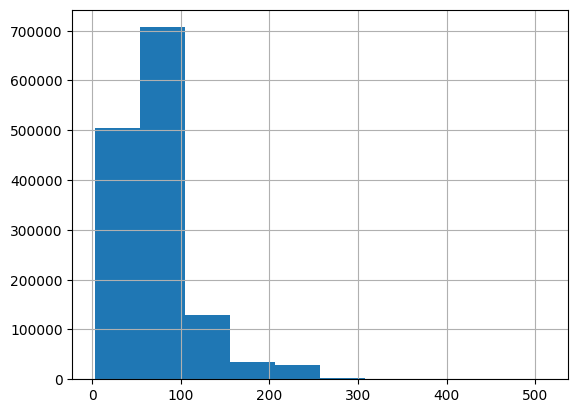

In [5]:
# Dask dataframe does not support hist
# hence the len will be computed first 
# and converted to pandas, then after it 
# will be plotted
headline_length = df_analyst["headline"].str.len().compute()
headline_length.hist()

#### No of words in news headlines

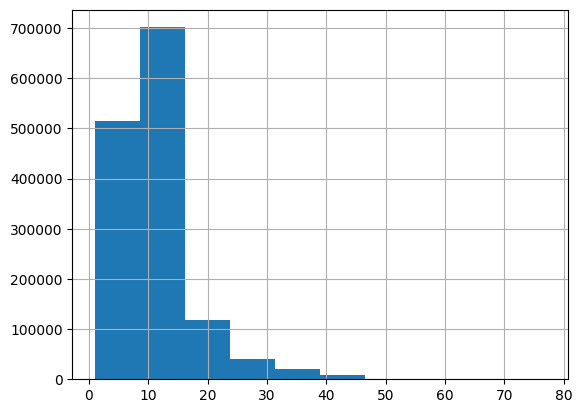

In [6]:
def plot_word_number_histogram(text):
    # Convert dask dataframe to pandas dataframe
    text_df = text.compute()
    headlines_no_of_words = text_df.str.split().\
        map(lambda x: len(x))

    headlines_no_of_words.hist()
    
plot_word_number_histogram(df_analyst["headline"])

#### Average word length in each sentence

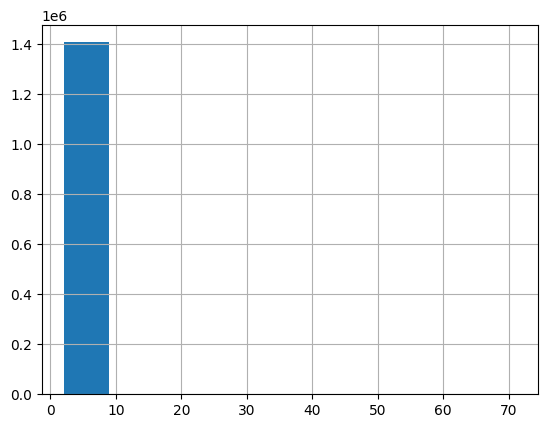

In [7]:
import numpy as np

def average_word_length_in_each_sentence(text):
   # Convert dask dataframe to pandas dataframe
   text_df = text.compute()
   text_df.str.split().\
      apply(lambda x : [len(i) for i in x]).\
      map(lambda x: np.mean(x)).hist()

average_word_length_in_each_sentence(df_analyst["headline"])

#### No of articles per publisher

In [8]:
grouped_df = df_analyst.groupby(["publisher"]).count()

In [9]:
grouped_df.head(100)

,Unnamed: 0,headline,url,date,stock
publisher,,,,,
AARP,7,7,7,7,7
ABNNewswire,13,13,13,13,13
Aakin,5,5,5,5,5
Aaron Jackson.Ed,16,16,16,16,16
Aaron Levitt,295,295,295,295,295
...,...,...,...,...,...
Bob Lang,18,18,18,18,18
Bob White,59,59,59,59,59
BobStewart,1,1,1,1,1


In [10]:
def descriptive_analysis():
    print("Printing data info")
    df_analyst.info()
    print("Prining data description")
    df_analyst.select_dtypes(include='number').describe()

descriptive_analysis()

Printing data info
<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 6 entries, Unnamed: 0 to stock
dtypes: int64(1), string(5)Prining data description


#### Analyzing publication dates

Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

In [11]:
grouped_date_df = df_analyst.groupby(["date"]).count()

In [12]:
grouped_date_df.head()

,Unnamed: 0,headline,url,publisher,stock
date,,,,,
2009-04-29 00:00:00,1,1,1,1,1
2009-05-22 00:00:00,1,1,1,1,1
2009-06-01 00:00:00,5,5,5,5,5
2009-06-09 00:00:00,7,7,7,7,7
2009-06-19 00:00:00,5,5,5,5,5


In [13]:
grouped_date_df = grouped_date_df.reset_index()

In [14]:
grouped_date_df.columns

Index(['date', 'Unnamed: 0', 'headline', 'url', 'publisher', 'stock'], dtype='object')

In [15]:
grouped_date_df.head()

,date,Unnamed: 0,headline,url,publisher,stock
0,2009-04-29 00:00:00,1,1,1,1,1
1,2009-05-22 00:00:00,1,1,1,1,1
2,2009-06-01 00:00:00,5,5,5,5,5
3,2009-06-09 00:00:00,7,7,7,7,7
4,2009-06-19 00:00:00,5,5,5,5,5


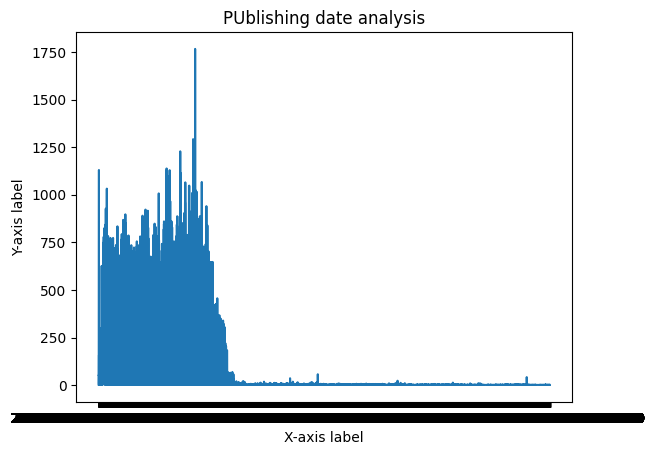

In [20]:
import matplotlib.pyplot as plt

grouped_date_df = grouped_date_df.compute()
plt.plot(grouped_date_df["date"], grouped_date_df["publisher"])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('PUblishing date analysis')
plt.show()

In [22]:
def publishing_stats():
    max_row = grouped_date_df.loc[grouped_date_df['publisher'].idxmax()]
    print(max_row)
    max_row = grouped_date_df.loc[grouped_date_df['publisher'].idxmin()]
    print(max_row)

publishing_stats()

date          2020-03-12 00:00:00
Unnamed: 0                   1766
headline                     1766
url                          1766
publisher                    1766
stock                        1766
Name: 8539, dtype: object
date          2009-04-29 00:00:00
Unnamed: 0                      1
headline                        1
url                             1
publisher                       1
stock                           1
Name: 0, dtype: object


#### Topic Modeling

##### Preprocessing and Lementization

In [16]:
# import nltk
# nltk.download('stopwords')
# stop=set(stopwords.words('english'))

In [17]:
df_analyst.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [18]:
# Dropping unnecessary columns
# Drop multiple columns
df_analyst_filtered = df_analyst.drop(['url', 'publisher', 'date', 'stock'], axis=1)

In [19]:
df_analyst_filtered.columns

Index(['Unnamed: 0', 'headline'], dtype='object')

In [21]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    for news in df['headline']:
        words=[w for w in word_tokenize(news) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

# Convert Dask DataFrame to pandas DataFrame
df_analyst_filtered_pd = df_analyst_filtered.compute()

corpus = preprocess_news(df_analyst_filtered_pd)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\redie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\redie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\redie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\redie/nltk_data'
    - 'd:\\Software Career\\Kifiya 10 Academy\\week1\\price-movement-with-news-sentiment\\env\\nltk_data'
    - 'd:\\Software Career\\Kifiya 10 Academy\\week1\\price-movement-with-news-sentiment\\env\\share\\nltk_data'
    - 'd:\\Software Career\\Kifiya 10 Academy\\week1\\price-movement-with-news-sentiment\\env\\lib\\nltk_data'
    - 'C:\\Users\\redie\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Create bag of words
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()